In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import csv
import pandas as pd
from collections import defaultdict
warnings.filterwarnings('ignore')

%matplotlib inline

In [81]:
officers = set()
complaints = set()
investigators = set()
complaint_dict = defaultdict(list)

with open('data/allegations.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        officer = row['officer_id']
        complaint = row['crid']
        investigator = row['investigator_id']
        
        officers.add(officer)
        complaints.add(complaint)
        investigators.add(investigator)
        complaint_dict[complaint].append(officer)
         

In [82]:
G = nx.Graph()
G.add_nodes_from(officers)
edges = [edge for edge in complaint_dict.values() if len(edge) > 1]

for officers in edges:
    for i, officer_a in enumerate(officers):
        for officer_b in officers[i + 1:]:
            if G.has_edge(officer_a, officer_b):
                G[officer_a][officer_b]['weight'] += 1
            else:
            # new edge. add with weight=1
                G.add_edge(officer_a, officer_b, weight=1)
                
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 8924\nNumber of edges: 28728\nAverage degree:   6.4384'

In [83]:
sorted([(n, G.neighbors(n)) for n in G.nodes()], key=lambda x: len(x[1]), reverse=True)

[('1166',
  ['4546',
   '7688',
   '1921',
   '3790',
   '7559',
   '2033',
   '8686',
   '4643',
   '2557',
   '7472',
   '1558',
   '1788',
   '3242',
   '7040',
   '914',
   '2622',
   '2092',
   '3140',
   '4684',
   '8660',
   '5498',
   '4788',
   '5113',
   '1437',
   '3693',
   '4233',
   '2377',
   '7210',
   '816',
   '7606',
   '558',
   '8123',
   '7571',
   '146',
   '361',
   '3182',
   '918',
   '3543',
   '3304',
   '4833',
   '2283',
   '3377',
   '3067',
   '5953',
   '2443',
   '3943',
   '116',
   '2894',
   '6981',
   '7295',
   '1338',
   '3520',
   '7588',
   '362',
   '2601',
   '2778',
   '7773',
   '243',
   '6069',
   '1694',
   '974',
   '4608',
   '7108',
   '4901',
   '3830',
   '656',
   '7044',
   '2261',
   '1284',
   '6270',
   '479',
   '3453']),
 ('3014',
  ['7429',
   '2629',
   '6439',
   '1892',
   '4832',
   '4658',
   '1525',
   '4343',
   '2158',
   '875',
   '370',
   '4581',
   '5329',
   '6740',
   '7942',
   '3327',
   '5693',
   '7780',
  

In [55]:
def extract_neighbor_edges(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for n1, n2 in G.edges():
        if (n1 == node and n2 in neighbors) or (n1 in neighbors and n2 == node):
            newG.add_edge(n1, n2)
            
    return newG

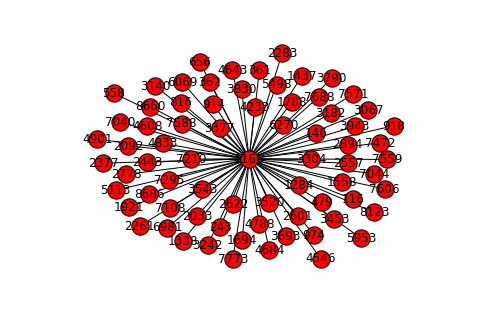

In [57]:
fig = plt.figure(0)
newG = extract_neighbor_edges(G, '1166')
nx.draw(newG, with_labels=True)

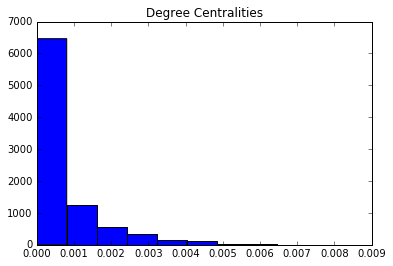

In [65]:
fig = plt.figure(0)
degree_centralities = list(nx.degree_centrality(G).values())
# degree_centralities = [v for k, v in nx.degree_centrality(G).items()]
plt.hist(degree_centralities)
plt.title('Degree Centralities')

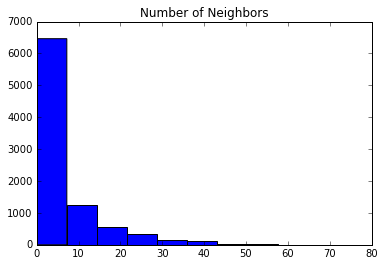

In [66]:
fig = plt.figure(1)
neighbors = [len(G.neighbors(node)) for node in G.nodes()]
plt.hist(neighbors)
plt.title('Number of Neighbors')

In [98]:
with open('degreecentralities.csv', 'w') as f:
    writer = csv.writer(f)
    for row in degree_cent.items():
        writer.writerow(row)

In [86]:
c = list(nx.k_clique_communities(G, 10))

In [87]:
c

[frozenset({'1471',
            '1510',
            '1701',
            '2333',
            '2391',
            '2404',
            '2466',
            '2898',
            '3168',
            '3248',
            '3375',
            '3499',
            '3575',
            '3580',
            '3726',
            '4304',
            '4704',
            '4742',
            '4830',
            '5017',
            '5026',
            '5042',
            '5043',
            '5549',
            '5650',
            '5893',
            '6376',
            '6679',
            '6774',
            '6856',
            '7046',
            '7056',
            '7103',
            '7336',
            '7349',
            '775',
            '7777',
            '8014',
            '8312',
            '954'}),
 frozenset({'1130',
            '1342',
            '3201',
            '3294',
            '4967',
            '5609',
            '6200',
            '634',
            '7162',
            '8072',
 